<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Image%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the required packages and setup some settings that will help us in this notebook.

In [1]:
# import the required packages
from fastai.vision import *
from fastai.metrics import error_rate
from google.colab import files

# black and white images
defaults.cmap='binary'

# Data

Today we will be training a Deep Learning model capable of classifying numbers! 

Below is a subset of our dataset that we will be training on our model on.


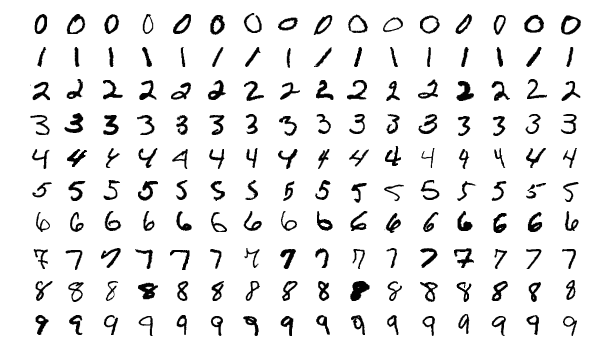


> At the end of this session you will be able to draw a single digit on *Google Drawings* and the modeel will be able to predict what that digit is. 

## Looking at data

As always, we start by downloading the dataset.

In [32]:
# Download MNIST dataset
path = untar_data(URLs.MNIST)

Unlike previously when we printed our dataframe and plotted each column, here with images we don't have to do those things. All we do is to create our dataloader and to make sure that it looks good. 

Of course, there are a set of preprocessing that can also be done with image data such as `augmentation` which we will discuss later today.

In [33]:
# Load data to fastai
data = ImageDataBunch.from_folder(path, train='training', valid='testing')

---

Use the `show_batch()` method to view a subset of the data.

---

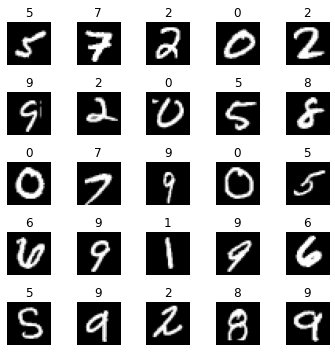

In [34]:
# view a batch of images
data.show_batch(figsize=(5,5))

# Hint: you might want to pass in figsize=(5,5) as an option to 
#       reduce the size of the output image

# Model

Time to train our model! Yes, we are actually ready to train our very first **classifier** (this the technical term for a Deep Learning model that classifies an image).

## Training

Here's where we define our model architecture

In [35]:
# define the model architecture
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

What is `cnn_learner`?
> CNN stands for Convolutional Neural Netowrk (sounds fancy right?) but really all its doing is detecting little features in your image. What are features? they could be as simple as a straight line or as complex as a car. The idea is that these *feature detectors* detect relevant features/patterns in our images so that later we can *classify* them more easily.

What is `models.resnet18`?
> Usually you would have to define the architecture (nuts and bolts) of your model. But for most common cases, we can steal someone else's architecture that has worked really well in competitions. `resnet18` is the perfect example of such network. It is the go-to default architecture for image data. Of course, you can change this architecture but I can promise you, for the vast majority of your applications, it is going to work just fine.

In [64]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.205388,0.112195,0.964800,00:30
1,0.157536,0.083404,0.972500,00:30
2,0.111131,0.066678,0.979500,00:30


You should see an accuracy above 95%. Not bad for only 3 epochs worth of training! 

> People used to train models for weeks to get above 90% for the same `MNIST` dataset that we were just able to do in just a couple of minutes.

## Testing

Here, you get a chance to draw your own digit and see if the model can classify it correctly. 

Before running the next cell, draw your own digit first!

1. Open [Google Drawing](http://docs.google.com/drawings)
2. Within Google Drawing click on `File -> Page Setup`
3. Choose `Custom` from the dropdown
4. Choose `28 x 28` `Pixels`
5. Start drawing with `Line -> Scribble`

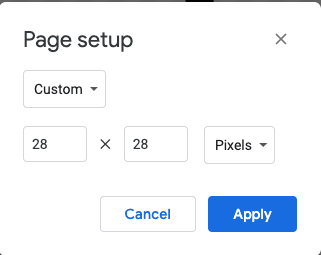

Once you're done, you can continue with the rest of the notebook. 

Follow the prompt after running the cell to choose your image from Google Drawing (you'd have to download it from there first)

In [83]:
# upload a new image
uploaded = files.upload()

# grab the name of the uploaded image
filename = list(uploaded)[0]

Saving mate.jpg to mate (4).jpg


Awesome, now that you have uploaded your image, let's run the following cells to make sure your image was uploaded correctly

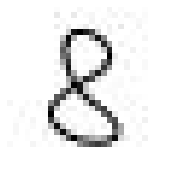

In [92]:
# open the image
image = open_image(filename)

# view the image
show_image(image);

Time to predict! 🤞 the model will predict correctly.

In [85]:
# predict the image!
learn.predict(image)

(Category tensor(8),
 tensor(8),
 tensor([1.5000e-06, 1.1284e-06, 3.8942e-08, 6.4898e-06, 8.1302e-09, 3.3592e-09,
         4.8641e-09, 2.5679e-10, 9.9999e-01, 9.6561e-09]))

What is the meaning of the output?
* Category tensor(`number`): the `number` in tensor is the prediction for the digit you've drawn
* The last tensor includes the probability of all classes:

  [`probability of digit 0`, `probability of digit 1`, `probability of digit 2`, ...]

Remember that the prediction of all models are **probabilities**. Notice that the largest number in the probability tensor is actually prediction for the model.

## Interpretation

Now that we've had some fun creating our own test images to evaluate the model's real-world performance, let's explore a more professional approach to the same task. 

Usually when your model is not performing well (and sometimes when it is) you would want to interpret its outputs. To help us with this task, we can use the `ClassificationInterpretation` functioanlity provided by `fastai`. 

In [86]:
# initialise the classification interpretation class
interp = ClassificationInterpretation.from_learner(learn)

### Top losses

Let's say our model predicted 98% of our validation set correctly. But we are interested to see for what images (the 2%) did the model fail to classify correctly. 

This is where `plot_top_losses` comes in handy. It will plot the images with the highest loss. 

---

Considering the output of our models are probabilities and loss is defined as the difference between the prediction and actual label of an image, can you describe what top losses refer to?

---

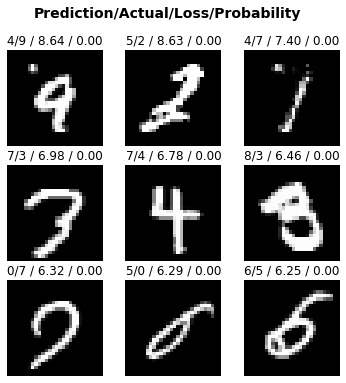

In [95]:
# view the top losses
interp.plot_top_losses(9, figsize=(6,6))

You might see that with a lot of `top_losses`, the images are quite difficult to classify (even for a human). This should give you confidence that the model is doing a very good job. But if you see images here that look obvious, yet the model failed to do a correct prediction, your model should be trained longer.

### Confusion matrix

Confusion matrix is a popular tool to quickly see where the *confusion* in the model comes from. 

You would want to see most of the numbers to be in the diagonal because this indicates your model is doing a good job at predicting. 

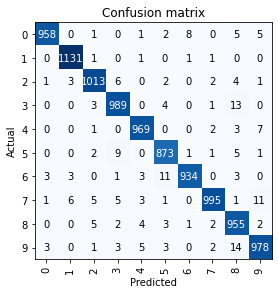

In [93]:
interp.plot_confusion_matrix()

---

What digits does the model find the most confusing? 

---

# Your turn!

Now that you know how to train a `classifier`. Let's put your knowledge to test with a new dataset. 

We will be looking at [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) (see far) dataset which was designed to push the limitations of Deep Learning models to `classify` images that are far (quite literally being able to see far!). 

---

Let's walk through the project together

---

In [ ]:
# Download MNIST dataset
path = untar_data(URLs.CIFAR_100)

In [ ]:
# look at the structure of the downloaded files
path.ls()

In [140]:
# Create the dataloader based on the folder structure
data = ImageDataBunch.from_folder(path, train='train', valid='test')

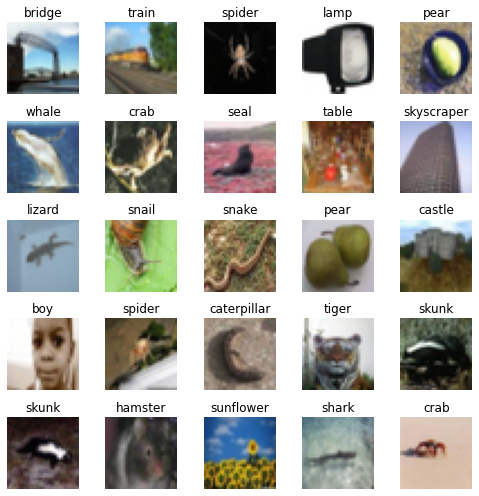

In [145]:
# display a batch of images using show_batch()
### YOUR CODE HERE


# hint use figsize=(7,7) parameter better sizing

In [146]:
# define your cnn_learner here
### YOUR CODE HERE
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

# hint: look at what we did previously form above

In [153]:
# use the fit method to train your model
### YOUR CODE HERE
learn.fit(5)


epoch,train_loss,valid_loss,accuracy,time
0,2.320016,2.174007,0.422200,00:28
1,2.269378,2.129753,0.429800,00:28
2,2.248764,2.098676,0.439300,00:28
3,2.215275,2.064959,0.440500,00:28
4,2.160314,2.044190,0.451200,00:29


Note that you can keep running the cell above to continue traning the model if your accuracy is not high enough.

In [154]:
# Interpret your model's performance
interp = ClassificationInterpretation.from_learner(learn)

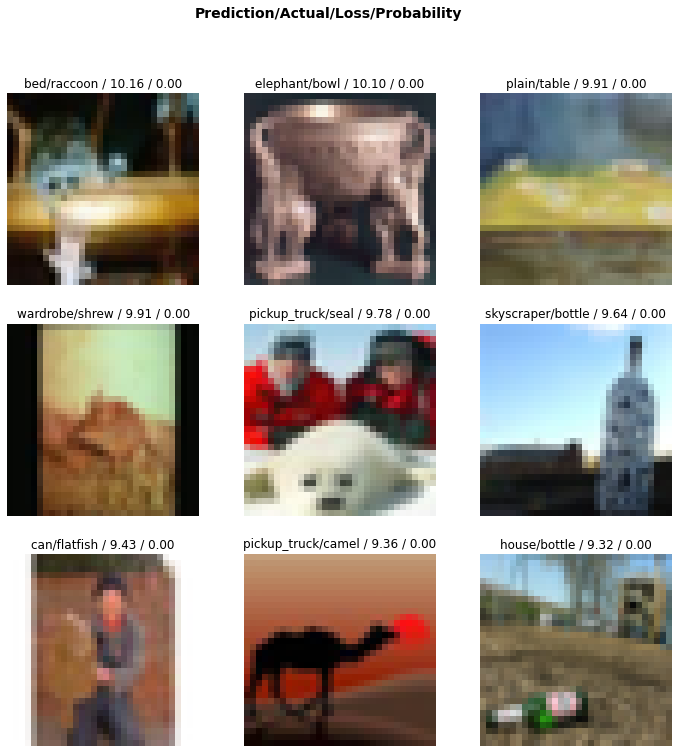

In [155]:
# plot the top losses
### YOUR CODE HERE
interp.plot_top_losses(9)

# hint you might have to increase the figsize for better sizing

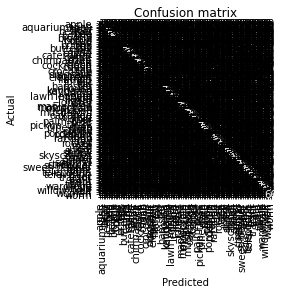

In [152]:
# plot the confusion matrix
### YOUR CODE HERE
interp.plot_confusion_matrix()


What's the problem with this? Do you think you can always use the confusion matrix? 

# Summary